In [332]:
# Music Genre Classification
# Experts have been trying for a long time to understand sound and what differentiates one song from another. How to visualize sound and what makes a tone different from another?
# So in this Project we will go through an in-depth analysis of sound and how we can visualize, classify and ultimately understand it.

__authors__ = "Pratik Bhankhodiya(MIT2021076), Saurav Sagar(MIT2021079) and Dhote Anurag(MIT2021082)"
__copyright__ = "Copyright (C) 2022 Indian Institute of Information Technology, Artificial Intelligence and Machine Learning"
__project__ = "Music Genre Classification"

In [1]:
# Installing Librosa

!pip install librosa

In [1]:
# Impoting Audio Libraries

import librosa
import librosa.display
import IPython.display as ipd


# Importing other required Libraries

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import pandas as pd
import os
import numpy as np
import seaborn as sns

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
# Different Genre in the Dataset

audio_path = './Gtzan Dataset/genres'
print(list(os.listdir(f'{audio_path}/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
audio_path = './Gtzan Dataset/sample.wav'

#Reading Audio File

import IPython.display as ipd
ipd.Audio(audio_path)


In [4]:
x , sr = librosa.load(audio_path)
print("x ::",type(x),"and sr ::", type(sr))
print("x is an audio time series as a numpy array having",x.shape,"values with a default sampling rate(sr) of",sr,"Hz.")

x :: <class 'numpy.ndarray'> and sr :: <class 'int'>
x is an audio time series as a numpy array having (662163,) values with a default sampling rate(sr) of 22050 Hz.


In [45]:
len(x)

662163

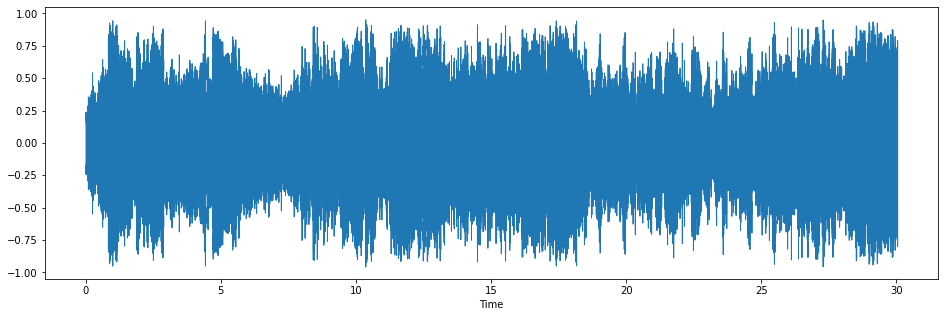

In [6]:
# Wave plot of the Audio file

plt.figure(figsize=(16, 5))
librosa.display.waveshow(x, sr=sr)

In [7]:
# Feature Extraction

In [8]:
# 1. Chroma Frequencies :: Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

hop_length = 10000
#Hop length is the length of the non-intersecting portion of window length.
#Here hop length is taken very large for better visualization

chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
chromagram

C:\Users\admin\AppData\Local\Temp/ipykernel_2576/3657230078.py:7: FutureWarning: Pass y=[ 0.13752025  0.14583795  0.11086822 ... -0.3272419  -0.44001397
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


array([[1.        , 1.        , 0.54873437, 0.3195422 , 0.21270335,
        1.        , 1.        , 0.34181088, 0.0318827 , 0.26841214,
        0.12189501, 0.05400123, 0.04531868, 0.07239375, 0.10922629,
        0.10294386, 0.16245045, 0.03966816, 0.27821708, 0.21838774,
        0.13763148, 0.0863566 , 0.16181669, 0.09495956, 0.18537866,
        0.2483595 , 0.5503176 , 0.62745094, 1.        , 1.        ,
        1.        , 1.        , 0.49392778, 0.96465755, 0.360788  ,
        0.9071573 , 0.84684294, 0.3422194 , 0.60481787, 0.29257756,
        0.17170332, 1.        , 0.2063926 , 0.3584797 , 0.11536176,
        1.        , 0.1980676 , 1.        , 0.5999001 , 0.4665842 ,
        0.1927057 , 0.70222676, 0.20478739, 0.44143325, 0.13123843,
        0.8301246 , 0.7645971 , 0.07739452, 0.3907337 , 1.        ,
        1.        , 0.0348463 , 0.33843416, 1.        , 0.34047544,
        0.11321876, 0.3576095 ],
       [0.9351345 , 0.7533526 , 0.52838933, 0.3637957 , 0.14303197,
        0.41548

In [9]:
# 12 features in 67 frames of an audio 

print(chromagram.shape)

(12, 67)


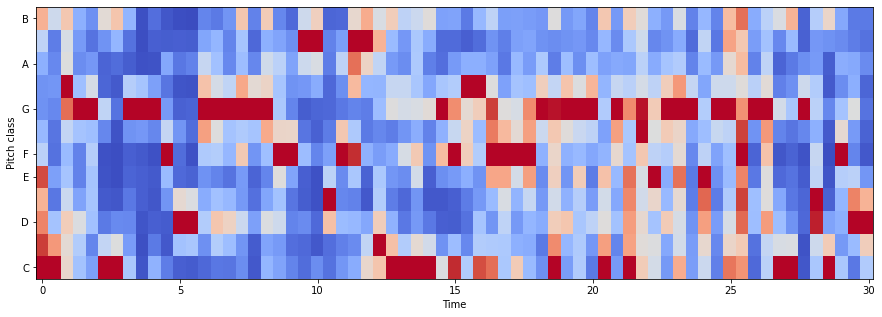

In [10]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [11]:
col_mean = chromagram.mean(axis=1)
col_var = chromagram.var(axis=1)

print("chroma_stft_mean ::",col_mean.mean())
print("chroma_stft_var ::",col_var.var())

chroma_stft_mean :: 0.36817208
chroma_stft_var :: 0.0009803225


In [12]:
# 2. Root-mean-square(RMS) :: The root-mean-square here refers to the total magnitude of the signal, which in layman terms can be interpreted as the loudness or energy parameter of the audio file.

S, phase = librosa.magphase(librosa.stft(x))
rms = librosa.feature.rms(S=S)
rms

array([[0.04825   , 0.07081807, 0.07081457, ..., 0.14361533, 0.16534191,
        0.16496004]])

In [13]:
print(rms.shape)

(1, 1294)


[Text(0.5, 1.0, 'log Power spectrogram')]

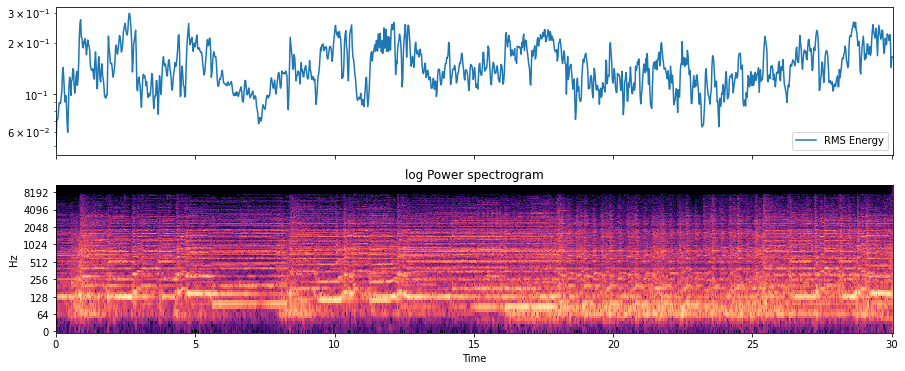

In [14]:
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [15]:
print("rms_mean ::",rms.mean())
print("rms_var ::",rms.var())

rms_mean :: 0.1474911277781785
rms_var :: 0.0018698088809324409


In [16]:
# 3. Spectral Centroid :: It indicates where the ” center of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. 

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids

C:\Users\admin\AppData\Local\Temp/ipykernel_2576/2979717968.py:3: FutureWarning: Pass y=[ 0.13752025  0.14583795  0.11086822 ... -0.3272419  -0.44001397
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


array([1422.80433514, 1181.57143114, 1050.99248335, ..., 1233.31871957,
       1276.86946149, 1460.79248926])

In [17]:
print(spectral_centroids.shape)

(1294,)


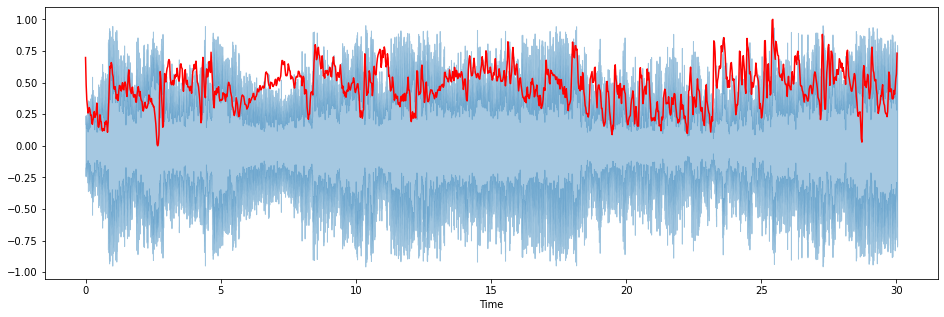

In [18]:
import sklearn
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    #return sklearn.preprocessing.minmax_scale(x, axis=axis)
    return sklearn.preprocessing.minmax_scale(x, feature_range=(0, 1), axis=axis, copy=True)
                                              
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.4)

plt.plot(t, normalize(spectral_centroids), color='r')

In [19]:
print("spectral_centroid_mean ::",spectral_centroids.mean())
print("spectral_centroid_var ::",spectral_centroids.var())

spectral_centroid_mean :: 1162.257498084044
spectral_centroid_var :: 29126.490106441586


In [20]:
# 4. Spectral Rolloff :: It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy (e.g., 85%) lies.

spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
spectral_rolloff

C:\Users\admin\AppData\Local\Temp/ipykernel_2576/1244636411.py:3: FutureWarning: Pass y=[ 0.14752026  0.15583795  0.12086822 ... -0.3172419  -0.43001398
  0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


array([2745.48339844, 2304.05273438, 1916.45507812, ..., 2368.65234375,
       2476.31835938, 2831.61621094])

In [21]:
spectral_rolloff.shape

(1294,)

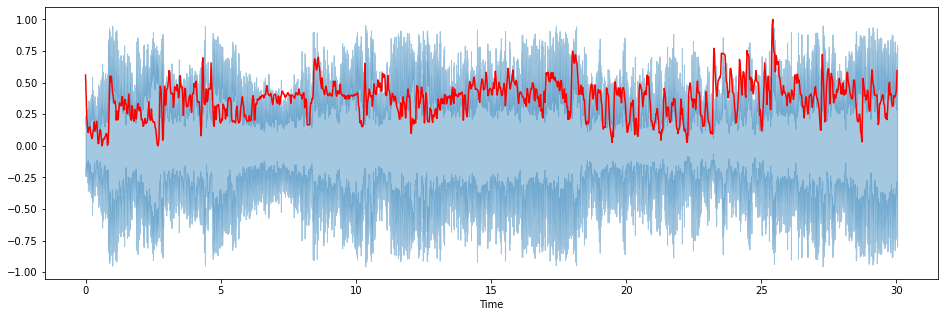

In [22]:
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(16, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [23]:
print("rolloff_mean ::",spectral_rolloff.mean())
print("rolloff_var ::",spectral_rolloff.var())

rolloff_mean :: 2281.779015377463
rolloff_var :: 119421.02896594815


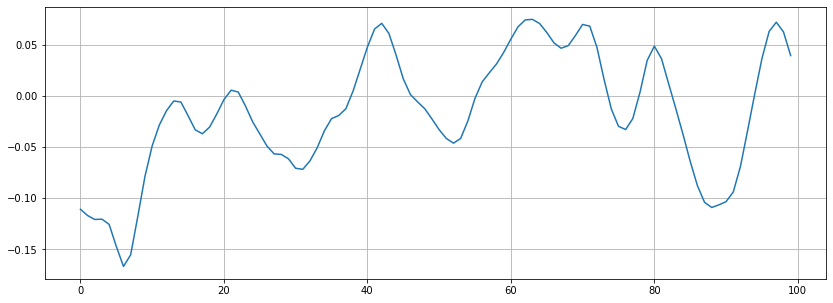

In [30]:
# 5. Zero-Crossing Rate :: The zero-crossing rate is the rate of sign-changes along with a signal, i.e., the rate at which the signal changes from positive to negative or back.

# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [31]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

9


In [32]:
zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(x[n0:n1]).mean()
zero_crossing_rate_var = librosa.feature.zero_crossing_rate(x[n0:n1]).var()

print("zero_crossing_rate_mean ::",zero_crossing_rate_mean)
print("zero_crossing_rate_var ::",zero_crossing_rate_var)

zero_crossing_rate_mean :: 0.00439453125
zero_crossing_rate_var :: 0.0


In [38]:
# 6. Tempo :: Tempo refers to the speed of an audio piece, which is usually measured in beats per minute (bpm) units.

hop_length = 200
# Compute local onset autocorrelation
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

In [40]:
frames = range(len(oenv))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

Text(0.5, 1.0, 'Beats')

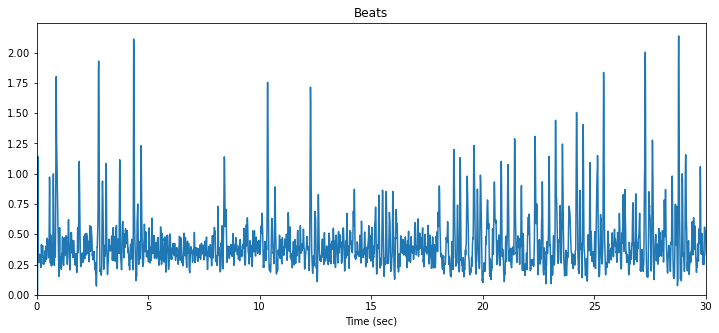

In [42]:
plt.figure(figsize=(12, 5))
plt.plot(t, oenv)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Beats')


[Text(0.5, 1.0, 'Tempogram')]

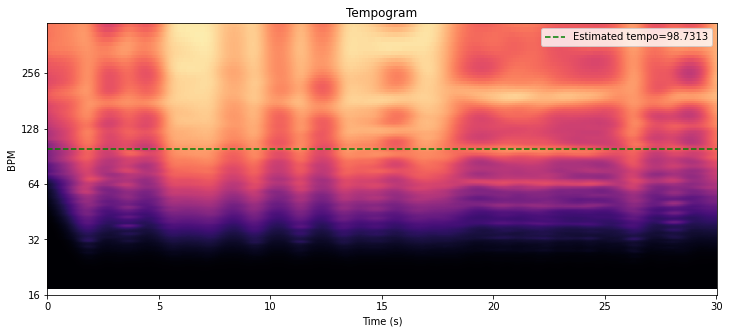

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))

librosa.display.specshow(tempogram, sr=sr, x_axis='s', y_axis='tempo', cmap='magma', ax=ax, hop_length=hop_length)
ax.axhline(tempo, color='g', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(tempo))
ax.legend(loc='upper right')
ax.set(title='Tempogram')

In [44]:
tempo

98.73134328358209

In [6]:
# 7. Mel-Frequency Cepstral Coefficients(mfccs) :: The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) that concisely describe the overall shape of a spectral envelope.

mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs)

[[-163.39485   -156.04796   -163.54916   ...  -51.890434   -38.871777
   -29.215084 ]
 [ 138.11574    159.19063    166.82893   ...  179.37744    161.89685
   139.0725   ]
 [  -9.88614    -28.94531    -35.42273   ...  -49.568104   -32.626656
    -7.3311434]
 ...
 [  -3.9162571   -3.7057502   -5.375778  ...   -6.9605002   -1.482011
    -2.4930325]
 [  -7.024662     0.9396159   -0.8410491 ...   -1.3132398    0.3044898
     2.2266402]
 [  -9.325693    -5.4526467   -3.1887574 ...   -7.435932    -5.3754153
    -2.5132012]]


C:\Users\admin\AppData\Local\Temp/ipykernel_7028/1107133232.py:3: FutureWarning: Pass y=[ 0.13752025  0.14583795  0.11086822 ... -0.3272419  -0.44001397
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


In [7]:
# Here mfcc calculated 20 MFCCs features over 1294 frames.
mfccs.shape

(20, 1294)

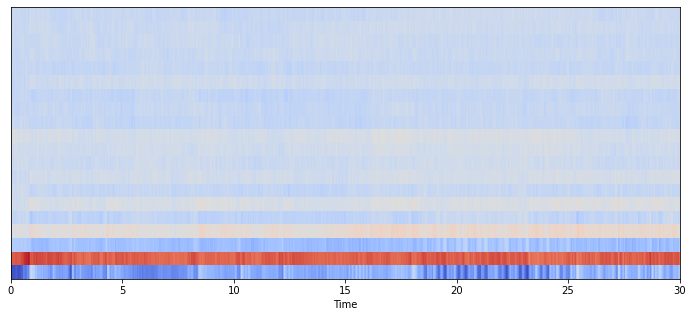

In [8]:
#Displaying  the MFCCs:

fig, ax = plt.subplots(figsize=(12, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [250]:
mfccs_mean = mfccs.mean(axis=1)
mfccs_var = mfccs.var(axis=1)
for i in range(0,20):
    print("mfcc"+str(i+1)+"_mean  ::",mfccs_mean[i])
    print("mfcc"+str(i+1)+"_var  ::",mfccs_var[i])

mfcc1_mean  :: -82.62067
mfcc1_var  :: 868.636
mfcc2_mean  :: 172.1487
mfcc2_var  :: 88.321785
mfcc3_mean  :: -49.347095
mfcc3_var  :: 115.08716
mfcc4_mean  :: 37.16482
mfcc4_var  :: 75.1624
mfcc5_mean  :: -10.87796
mfcc5_var  :: 71.74392
mfcc6_mean  :: 17.654997
mfcc6_var  :: 43.75489
mfcc7_mean  :: -6.4198728
mfcc7_var  :: 31.751757
mfcc8_mean  :: 9.017501
mfcc8_var  :: 28.157246
mfcc9_mean  :: 2.2299304
mfcc9_var  :: 27.119385
mfcc10_mean  :: 7.3802457
mfcc10_var  :: 27.00015
mfcc11_mean  :: 12.8752365
mfcc11_var  :: 33.868458
mfcc12_mean  :: -8.164629
mfcc12_var  :: 25.866367
mfcc13_mean  :: -5.7669096
mfcc13_var  :: 27.170776
mfcc14_mean  :: -9.447662
mfcc14_var  :: 27.18405
mfcc15_mean  :: 4.6910563
mfcc15_var  :: 24.065458
mfcc16_mean  :: -6.822053
mfcc16_var  :: 20.024048
mfcc17_mean  :: -1.7949966
mfcc17_var  :: 20.484913
mfcc18_mean  :: -1.7920235
mfcc18_var  :: 20.975567
mfcc19_mean  :: 0.21146362
mfcc19_var  :: 24.017185
mfcc20_mean  :: -2.2690015
mfcc20_var  :: 27.363943


In [2]:
# Different Genre in the Dataset

audio_path = './Gtzan Dataset/genres'
print(list(os.listdir(f'{audio_path}/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
#Loading extracted features Dataset 

df = pd.read_csv('./Gtzan Dataset/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df.shape

(1000, 54)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   rolloff_mean             1000 non-null   float64
 9   rolloff_var              1000 non-null   float64
 10  zero_crossing_rate_mean  1000 non-null   float64
 11  zero_crossing_rate_var   1000 non-null   float64
 12  tempo                    1000 non-null   float64
 13  mfcc1_mean               1000 non-null   float64
 14  mfcc1_var                

In [6]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

C:\Users\admin\AppData\Local\Temp/ipykernel_260/2774405096.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


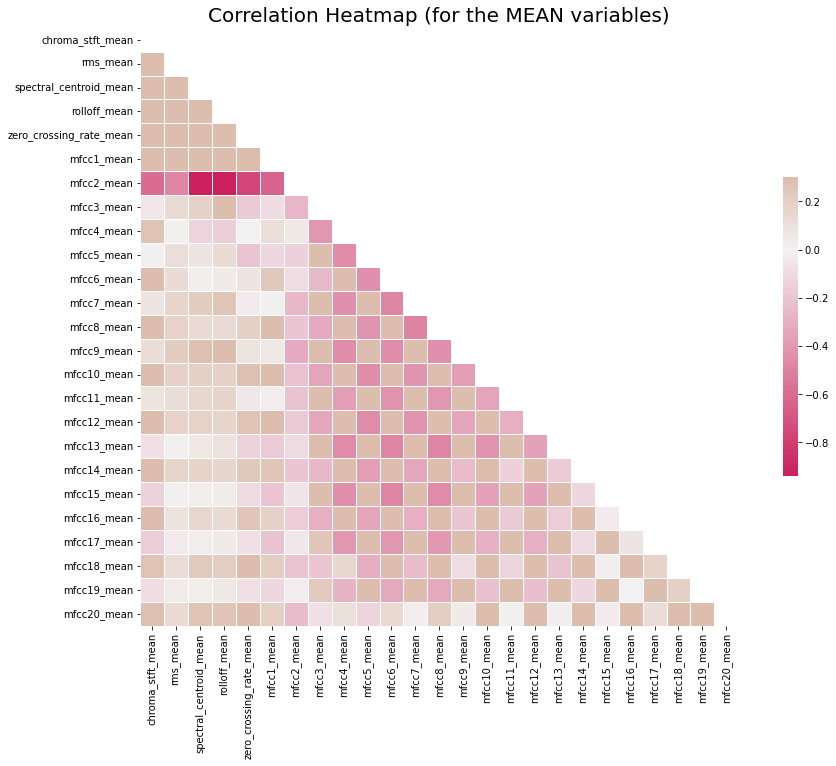

In [7]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

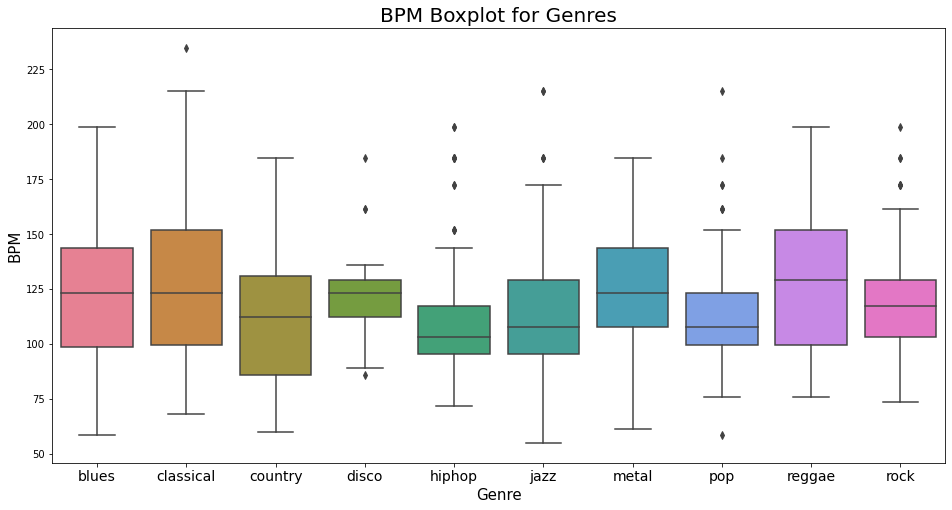

In [8]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [10]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,0
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,0
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,0
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,0
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.6892,4253.557033,1.222421e+06,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,9
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.7095,4149.338328,1.046621e+06,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,9
997,rock.00097.wav,661794,0.432142,0.075269,0.081651,0.000322,2077.526598,231657.9680,4031.405321,8.042154e+05,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,9
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.7311,3015.631004,1.332712e+06,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,9


In [11]:
features = df.drop(['label','filename'],axis=1)
target = df['label'] 

In [12]:
features

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,3805.839606,9.015054e+05,0.083045,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,3550.522098,2.977893e+06,0.056040,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,3042.260232,7.840345e+05,0.076291,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,2184.745799,1.493194e+06,0.033309,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,3579.757627,1.572978e+06,0.101461,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.6892,4253.557033,1.222421e+06,0.089227,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.7095,4149.338328,1.046621e+06,0.097664,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075269,0.081651,0.000322,2077.526598,231657.9680,4031.405321,8.042154e+05,0.121823,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.7311,3015.631004,1.332712e+06,0.048724,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [13]:
target

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label, Length: 1000, dtype: int32

In [14]:
cols = features.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features)

# new data frame with the new scaled data. 
features = pd.DataFrame(np_scaled, columns = cols)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 52), (800,), (200, 52), (200,))

In [16]:
import seaborn as sns

def model_evaluation(model, title = "Default"):
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    cf_matrix = (confusion_matrix(y_test, preds))
    #print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title(str(title)+"'s Confusion Matrix with Accuracy ::"+ str(round(accuracy_score(y_test, preds), 5))+"\n\n");
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
    ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

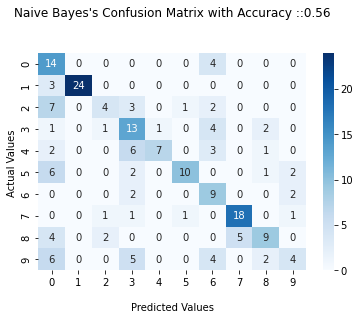

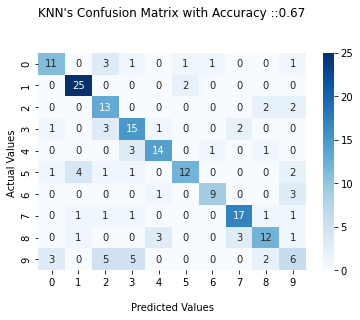

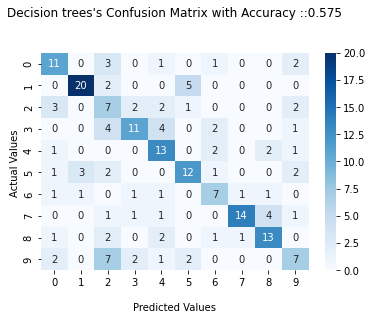

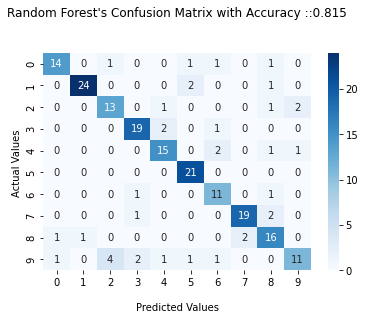

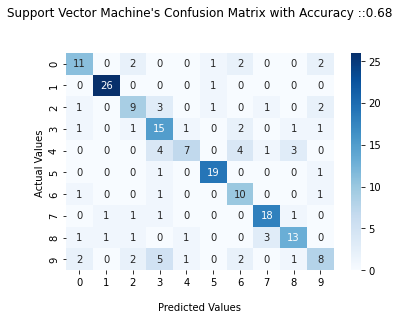

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


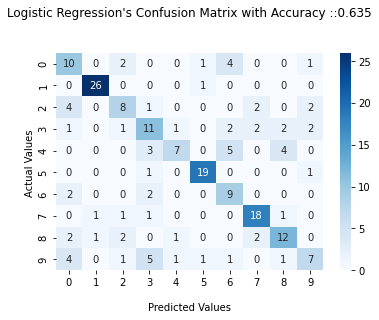

In [37]:
# Naive Bayes
nb = GaussianNB()
model_evaluation(nb, "Naive Bayes")

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
model_evaluation(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_evaluation(tree, "Decision trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_evaluation(rforest, "Random Forest")
